In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold

from sklearn.metrics import roc_auc_score, accuracy_score

In [3]:
os.chdir('/home/melissa/RESULTS/XGBoost/SYNGAP1/Datasets/')
all_animals = pd.read_csv('all_animals.csv')
clean_animals = all_animals.drop(['Unnamed: 0'], axis = 1)

In [4]:
SYNGAP_het = ['S7063', 'S7064', 'S7069', 'S7072', 'S7075', 'S7076', 'S7088', 'S7092', 'S7094', 'S7096']
SYNGAP_wt = ['S7068', 'S7070', 'S7071', 'S7074', 'S7083', 'S7086', 'S7091', 'S7098', 'S7101'] 

all_train_ids =  ['S7094', 'S7069', 
                  'S7072', 'S7070', 'S7092', 'S7068', 'S7088', 
                  'S7071','S7101', 'S7083', 'S7091'] #S7063 #S7064  

all_test_ids = ['S7076', 'S7086'] 

In [5]:
train_cv = clean_animals[clean_animals['Animal_ID'].isin(all_train_ids)]
test_cv = clean_animals[clean_animals['Animal_ID'].isin(all_test_ids)]
clean_train = train_cv.dropna()
clean_test = test_cv.dropna()

In [19]:
X_train = clean_train[clean_train["Animal_ID"].isin(all_train_ids)]
X_test = clean_test[clean_test["Animal_ID"].isin(all_test_ids)]
y_train = X_train.iloc[:, 0]
y_test = X_test.iloc[:, 0]

oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
X_train_new = X_train_res.iloc[:, 2:]
X_test_new = X_test.iloc[:, 2:]

In [59]:
X_test.loc[X_test['Genotype'] == 0]

,Genotype,Animal_ID,SleepStage,Motor_DispEn,Motor_Hurst,Motor_HFD,Motor_Gamma,Motor_Theta,Soma_DispEn,Soma_Hurst,...,Mot_CC_Left,Som_CC_Right,Som_CC_Left,Vis_CC_Right,Mot_PL_Right,Mot_PL_Left,Som_PL_Right,Som_PL_Left,Vis_PL_Right,Vis_PL_Left
138126,0,S7086,1,2.958374,0.631345,1.325671,0.364479,23.263520,2.938686,0.650333,...,0.909036,0.767172,0.947438,0.704816,0.888315,0.830064,0.483348,0.854410,0.599462,0.813000
138127,0,S7086,0,3.212919,0.749525,1.522106,0.521612,4.419808,3.259342,0.787032,...,0.795277,0.658400,0.852484,0.589339,0.888031,0.730659,0.644452,0.780976,0.637575,0.700257
138128,0,S7086,0,3.596962,0.776209,1.714367,0.567699,2.786780,3.610001,0.792275,...,0.896728,0.764651,0.889167,0.380547,0.782435,0.731660,0.672365,0.833841,0.237703,0.780705
138129,0,S7086,0,3.645975,0.697163,1.654251,0.579019,7.190619,3.435217,0.749047,...,0.692094,0.433961,0.896969,0.369072,0.512921,0.658146,0.333676,0.810244,0.271225,0.594244
138130,0,S7086,0,2.384456,0.969072,1.705823,0.494877,3.452952,2.508719,0.956887,...,0.943782,0.913864,0.985364,0.967983,0.936272,0.955344,0.737126,0.961491,0.962719,0.945306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157739,0,S7086,0,3.503542,0.688270,1.571832,0.469348,7.724450,3.317700,0.724037,...,0.471619,0.316317,0.655263,0.650130,0.560942,0.711831,0.340095,0.513026,0.659010,0.375716
157740,0,S7086,0,3.409324,0.689735,1.564084,0.417805,6.865412,3.357487,0.685533,...,0.483596,0.467594,0.831839,0.546804,0.610543,0.604628,0.395368,0.732930,0.640705,0.306564
157741,0,S7086,0,3.445880,0.687197,1.616692,0.723857,8.292359,3.420932,0.651160,...,0.367735,0.353838,0.896590,0.511940,0.652063,0.458369,0.198772,0.825806,0.550667,0.255471
157742,0,S7086,0,3.567423,0.691989,1.568775,0.469656,6.313427,3.555423,0.677806,...,0.274762,0.523838,0.883582,0.138565,0.645093,0.477122,0.416264,0.813960,0.043276,0.257709


In [26]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_new)
X_test_std = sc.transform(X_test_new)

In [27]:
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train_new.columns)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_train_new.columns)
group_by_patient_id = X_train_res.groupby(['Animal_ID'])
groups_by_patient_id_list = np.array(X_train_res['Animal_ID'].values)
groups_by_patient_id_list

array(['S7070', 'S7070', 'S7070', ..., 'S7072', 'S7092', 'S7069'],
      dtype=object)

In [28]:
n_splits = 3
group_kfold = GroupKFold(n_splits = n_splits)
print(group_kfold.get_n_splits(X_train_std_df, y_train_res, groups = groups_by_patient_id_list))

result = []
y_result = []
for train_idx, val_idx in group_kfold.split(X_train_std_df, y_train_res, groups = groups_by_patient_id_list):
    train_fold = X_train_std_df.iloc[train_idx]
    val_fold = X_train_std_df.iloc[val_idx]
    train_y_fold = y_train_res.iloc[train_idx]
    val_y_fold = y_train_res.iloc[val_idx]
    result.append((train_fold, val_fold))
    y_result.append((train_y_fold, val_y_fold))
    
train_fold_1, val_fold_1 = result[0][0],result[0][1]
train_fold_2, val_fold_2 = result[1][0],result[1][1]
train_fold_3, val_fold_3 = result[2][0],result[2][1]


y_train_fold_1, y_val_fold_1 = y_result[0][0],y_result[0][1]
y_train_fold_2, y_val_fold_2 = y_result[1][0],y_result[1][1]
y_train_fold_3, y_val_fold_3 = y_result[2][0],y_result[2][1]

3


In [32]:
lr_clf = LogisticRegression(solver='liblinear', C = 2, max_iter=500)
lr_clf.fit(X_train_std_df, y_train_res)

LogisticRegression(C=2, max_iter=500, solver='liblinear')

In [33]:
print(lr_clf.score(train_fold_1, y_train_fold_1))
print(lr_clf.score(train_fold_2, y_train_fold_2))
print(lr_clf.score(train_fold_3, y_train_fold_3))
print(lr_clf.score(X_test_std_df, y_test))

0.7997672658621335
0.8729548095342775
0.8699298671367629
0.6035229285573706


## Fold 1

In [35]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('Precision: ' + str(metrics.precision_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('Recall: ' + str(metrics.recall_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('F1: ' + str(metrics.f1_score(y_train_fold_1, lr_clf.predict(train_fold_1))))
print('roc auc ' + str(metrics.roc_auc_score(y_train_fold_1, lr_clf.predict(train_fold_1))))

Accuracy: 0.7997672658621335
Precision: 0.7308390362488969
Recall: 0.8387059790189746
F1: 0.781065931132663
roc auc 0.8047953457189155


## Fold 2

In [37]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('Precision: ' + str(metrics.precision_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('Recall: ' + str(metrics.recall_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('F1: ' + str(metrics.f1_score(y_train_fold_2, lr_clf.predict(train_fold_2))))
print('roc auc ' + str(metrics.roc_auc_score(y_train_fold_2, lr_clf.predict(train_fold_2))))

Accuracy: 0.8729548095342775
Precision: 0.8394571274492181
Recall: 0.8655977757182577
F1: 0.8523270669830261
roc auc 0.8719792425212193


## Fold 3

In [38]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('Precision: ' + str(metrics.precision_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('Recall: ' + str(metrics.recall_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('F1: ' + str(metrics.f1_score(y_train_fold_3, lr_clf.predict(train_fold_3))))
print('roc auc ' + str(metrics.roc_auc_score(y_train_fold_3, lr_clf.predict(train_fold_3))))

Accuracy: 0.8699298671367629
Precision: 0.8916880970943831
Recall: 0.9083032063059325
F1: 0.899918967481298
roc auc 0.8544344279729869


## Test set 

In [39]:
print('Accuracy: ' + str(metrics.accuracy_score(y_test, lr_clf.predict(X_test_std_df))))
print('Precision: ' + str(metrics.precision_score(y_test, lr_clf.predict(X_test_std_df))))
print('Recall: ' + str(metrics.recall_score(y_test, lr_clf.predict(X_test_std_df))))
print('F1: ' + str(metrics.f1_score(y_test, lr_clf.predict(X_test_std_df))))
print('roc auc ' + str(metrics.roc_auc_score(y_test, lr_clf.predict(X_test_std_df))))

Accuracy: 0.6035229285573706
Precision: 0.42890470080485243
Recall: 0.3383327199116673
F1: 0.37827272259657424
roc auc 0.5443829977374628


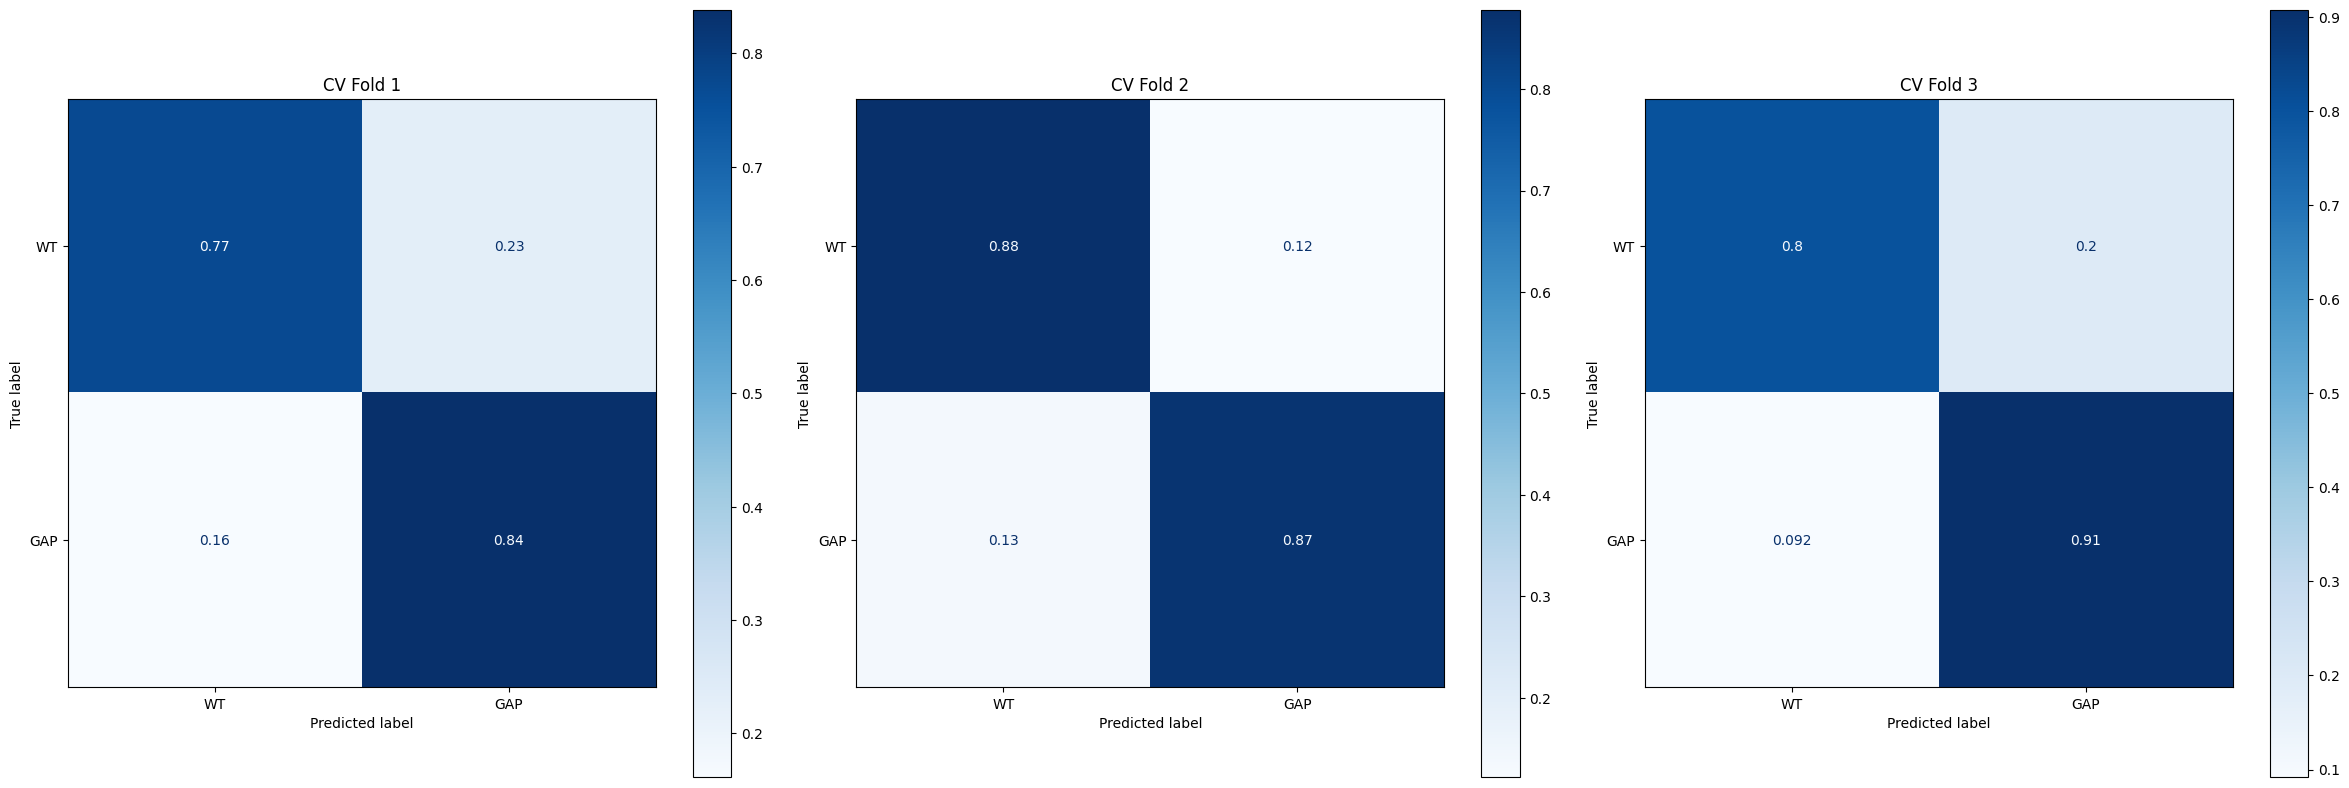

In [40]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Confusion Matrix for CV Fold 1
cm1 = metrics.confusion_matrix(y_train_fold_1, lr_clf.predict(train_fold_1), normalize = 'true')
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['WT', 'GAP'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('CV Fold 1')

# Confusion Matrix for CV Fold 2
cm2 = metrics.confusion_matrix(y_train_fold_2, lr_clf.predict(train_fold_2), normalize = 'true')
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['WT', 'GAP'])
disp2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('CV Fold 2')

# Confusion Matrix for CV Fold 3
cm3 = metrics.confusion_matrix(y_train_fold_3, lr_clf.predict(train_fold_3), normalize = 'true')
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['WT', 'GAP'])
disp3.plot(ax=axes[2], cmap='Blues')
axes[2].set_title('CV Fold 3')

# Adjust layout
plt.tight_layout()

# Change directory to save the plots
os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Evaluation_Plots/Logistic_Regression/')
# Save the plots

plt.savefig('confusion_matrix_cv_folds_normalise.jpg')
plt.savefig('confusion_matrix_cv_folds_normalise.svg')

plt.show()

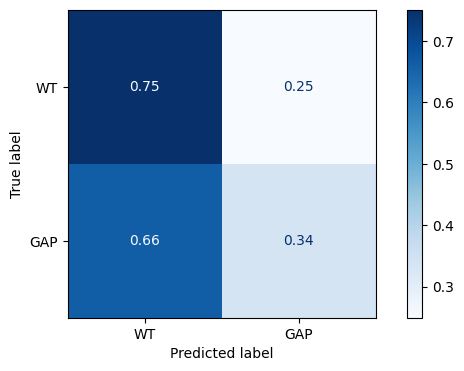

In [41]:
fig, ax = plt.subplots(figsize = (8,4))

cm_test = metrics.confusion_matrix(y_test,  lr_clf.predict(X_test_std_df), normalize = 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = ['WT', 'GAP'])
disp.plot(ax = ax, cmap = 'Blues')

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Evaluation_Plots/Logistic_Regression/')
plt.savefig('confusion_matrix_test.jpg')
plt.savefig('confusion_matrix_test.svg')
plt.show()

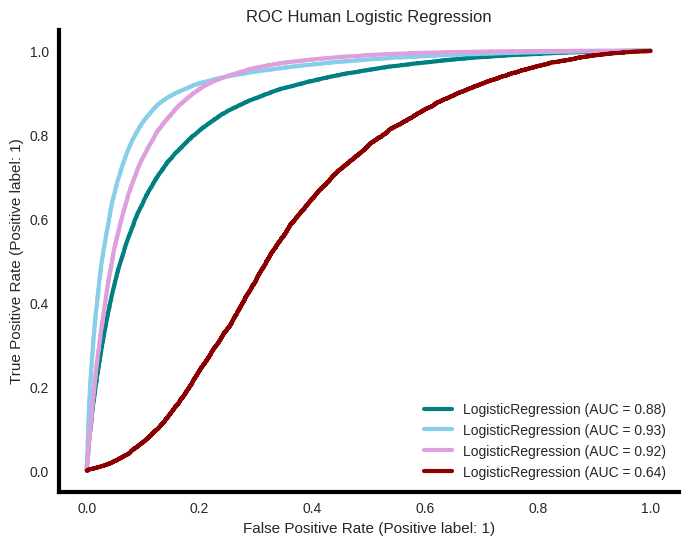

In [42]:
import matplotlib.pyplot as plt
from yellowbrick import classifier
fig, axes = plt.subplots(figsize = (8, 6), ncols = 1)

metrics.RocCurveDisplay.from_estimator(lr_clf, train_fold_1, y_train_fold_1, ax = axes, color = 'teal', linewidth=3) #label = 'CV Fold 1', color = 'teal', linewidth=3)
metrics.RocCurveDisplay.from_estimator(lr_clf, train_fold_2, y_train_fold_2, ax = axes, color = 'skyblue', linewidth=3) #, label = 'CV Fold 2', color = 'skyblue', linewidth=3)
metrics.RocCurveDisplay.from_estimator(lr_clf, train_fold_3, y_train_fold_3, ax = axes, color = 'plum', linewidth=3) #, label = 'CV Fold 3', color = 'plum', linewidth=3)
metrics.RocCurveDisplay.from_estimator(lr_clf, X_test_std_df, y_test, ax = axes, color = 'darkred', linewidth = 3) #, label = 'Test', color='darkred', linewidth=3)
axes.set(title = 'ROC Human Logistic Regression')
axes.grid(False)

# Remove the top and right spines
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Make bottom (X-axis) and left (Y-axis) spines thicker
axes.spines['bottom'].set_linewidth(3)
axes.spines['left'].set_linewidth(3)
axes.spines['bottom'].set_edgecolor('black')
axes.spines['left'].set_edgecolor('black')

# Remove the background grid
axes.grid(False)
# Save the plot as a PNG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Rat/Evaluation_Plots/Logistic_Regression/' + 'dec_log_reg_roc_curve_train_test.jpg', format='png')

# Save the plot as an SVG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Rat/Evaluation_Plots/Logistic_Regression/' + 'dec_log_reg_roc_curve_train_test.svg', format='svg')
plt.show()

## look at predictions per animal 

In [45]:
pred_train = lr_clf.predict(X_train_std_df)

In [46]:
pred_train

array([0, 0, 1, ..., 1, 1, 1])

In [49]:
copy_X_train = X_train_res.copy()
copy_X_train["pred"] = pred_train

In [50]:
count_matches = copy_X_train['Genotype'].eq(copy_X_train['pred']).groupby(copy_X_train['Animal_ID']).sum()

print(count_matches / copy_X_train.groupby("Animal_ID").count()["Genotype"])

Animal_ID
S7068    0.448460
S7069    0.955582
S7070    0.720760
S7071    0.952054
S7072    0.885009
S7083    0.965122
S7088    0.818429
S7091    0.967373
S7092    0.637011
S7094    0.905928
S7101    0.771160
dtype: float64


In [55]:
pred_test = lr_clf.predict(X_test_std_df)
copy_X_test= X_test.copy()
copy_X_test["pred"] = pred_test

count_matches = copy_X_test['Genotype'].eq(copy_X_test['pred']).groupby(copy_X_test['Animal_ID']).sum()

print(count_matches / copy_X_test.groupby("Animal_ID").count()["Genotype"])

Animal_ID
S7076    0.338333
S7086    0.750433
dtype: float64
